In [1]:
import numpy as np  # モジュールnumpyを読み込み
import matplotlib.pyplot as plt  # モジュールmatplotlibのpylab関数を読み込み
%matplotlib inline

In [2]:
def bernstein(t, n, i):  # bernstein基底関数の定義
    cn, ci, cni = 1.0, 1.0, 1.0
    for k in range(2, n, 1):
        cn = cn * k
    for k in range(1, i, 1):
        if i == 1:
            break
        ci = ci * k
    for k in range(1, n - i + 1, 1):
        if n == i:
            break
        cni = cni * k
    j = t**(i - 1) * (1 - t)**(n - i) * cn / (ci * cni)
    return j

In [3]:
def bezierplot(t, cp):  # bezier曲線の定義
    n = len(cp)
    r = np.zeros([len(t), 2])
    for k in range(len(t)):
        sum1, sum2 = 0.0, 0.0
        for i in range(1, n + 1, 1):
            bt = bernstein(t[k], n, i)
            sum1 += cp[i - 1, 0] * bt
            sum2 += cp[i - 1, 1] * bt
        r[k, :] = [sum1, sum2]
    return np.array(r)

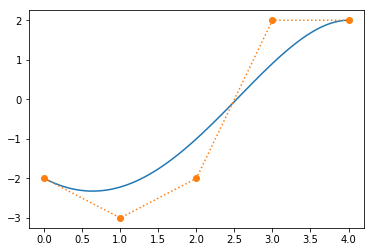

In [5]:
cp = np.array([[0, -2], [1, -3], [2, -2], [3, 2], [4, 2], [5, 0]])  # 制御点座標
t = np.arange(0, 1 + 0.01, 0.01)  # パラメータ生成
p = bezierplot(t, cp)  # bezier曲線生成
plt.figure()
plt.plot(p[:, 0], p[:, 1])
plt.plot(cp[:, 0], cp[:, 1], ls=':', marker='o')
plt.show()